<a href="https://colab.research.google.com/github/SampMark/Computational-Thinking/blob/main/Problem_Set2_iRobot_Simulation_of_Vacuum_Robots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Set2**: Simulação de Robôs Aspiradores

A empresa iRobot desenvolveu o robô Roomba para aspirar ambientes automaticamente, revolucionando a limpeza doméstica. O objetivo deste problema é simular o comportamento desses robôs em um ambiente retangular virtual, avaliando quanto tempo eles levam para limpar uma sala ao adotar diferentes estratégias de movimento e limpeza.

O exercício propõe o desenvolvimento de uma simulação computacional que permita comparar a eficiência de diferentes estratégias de limpeza. O foco está em determinar o tempo necessário para que um grupo de robôs aspiradores limpe uma fração específica da sala.

Para resolver o Conjunto de Problemas 2, será necessário implementar classes e métodos que permitam:

* Rastrear as posições dos robôs dentro de uma sala retangular.
* Realizar a limpeza de partes da sala simulada.
* Simular o movimento dos robôs com base em diferentes estratégias de limpeza.
* Registrar e comparar o desempenho das estratégias.

O objetivo final é criar um programa capaz de:

* Simular o movimento dos robôs em uma sala retangular.
* Registrar os ladrilhos limpos e a evolução da limpeza ao longo do tempo.
* Comparar a eficiência das estratégias de limpeza com base no tempo total necessário para limpar a sala. Mas outros critérios de comparação podem ser empregados, como a distância percorrida pelos robôs.

As estratégias específicas de limpeza serão definidas posteriormente, e a análise comparativa explicitará qual abordagem é mais eficiente em termos de tempo e movimento.

**Simulação**

A simulação se passa em uma sala retangular de dimensões w (largura) e h (altura), representada por uma grade de células quadradas de tamanho 1x1. A sala contém N robôs, considerados pontos que podem se atravessar e ocupar o mesmo ponto sem interferência.

Cada robô possui uma posição inicial aleatória dentro da sala, representada por coordenadas (x, y), e uma direção de movimento aleatória, representada por um ângulo d em graus. Os robôs se movem a uma velocidade constante s e, a cada passo de tempo, avançam s unidades na direção d.

Ao se deparar com uma parede, o robô escolhe aleatoriamente uma nova direção e continua o movimento. A simulação termina quando uma fração específica das células da sala estiver limpa.

**Detalhes da Simulação**

* **Robôs**:
  * A quantidade de robôs N é um número inteiro maior que zero.
  * Os robôs são representados como pontos e podem se atravessar.
  * Cada robô possui uma posição inicial aleatória (x, y) e uma direção de movimento aleatória d.
* **Sala**:
  * A sala é retangular com largura w e altura h.
  * A sala é inicialmente totalmente suja.
  * Os robôs não podem atravessar as paredes.
* **Células**:
  * A sala é dividida em células quadradas de tamanho 1x1.
  * Uma célula é considerada limpa quando um robô passa por qualquer ponto dentro dela.
  * As células são referenciadas por coordenadas (0, 0), (0, 1), ..., (0, h-1), (1, 0), (1, 1), ..., (w-1, h-1).

**Movimento dos Robôs**:
* Os robôs se movem a uma velocidade constante s.
* A cada passo de tempo, um robô avança s unidades na direção d.
* Se um robô encontrar uma parede, ele escolhe aleatoriamente uma nova direção.

**Término**:
* A simulação termina quando uma fração pré-definida das células estiver limpa.

In [17]:
import matplotlib.pyplot as plt
from tqdm import tqdm  # Para barra de progresso
import random
import math

## **Classe `Position`**

Representa uma posição no plano cartesiano 2D com coordenadas x e y. Possibilita calcular novas posições do robô ao mover-se em determinada direção (angle) com uma velocidade (speed).

**Métodos**:

* `__init__(self, x, y)`: inicializa uma nova posição com valores de x e y.
* `getX(self)` e `getY(self)`: retornam as coordenadas x e y respectivamente.
* `getNewPosition(self, angle, speed)`: calcula a nova posição após um movimento baseada no ângulo (em graus), que define a direção do movimento, e na velocidade, a qual define o deslocamento por unidade de tempo, as funções trigonométricas utilizadas, cosseno e seno, servem:
  * `cos(angle)` para calcular o deslocamento vertical (`delta_y`).
  * `sin(angle)` para calcular o deslocamento horizontal (`delta_x`).
* `__str__(self)`: retorna a posição em formato (x.xx, y.yy) para facilitar a visualização.

In [18]:
# Classe 'Position' fornecida
class Position(object):
    """
    Representa uma posição em um espaço bidimensional (x, y).
    """
    def __init__(self, x, y):
        """
        Inicializa uma posição com coordenadas (x, y).

        Parâmetros:
        - x: coordenada x (float).
        - y: coordenada y (float).
        """
        self.x = x
        self.y = y

    def getX(self):
        """
        Retorna a coordenada x da posição.
        Retorna:
        - um float representando a coordenada x.
        """
        return self.x

    def getY(self):
        """
        Retorna a coordenada y da posição.
        Retorna:
        - um float representando a coordenada y.
        """
        return self.y

    def getNewPosition(self, angle, speed):
        """
        Calcula e retorna a nova posição após um intervalo de tempo (clock-tick),
        dado o ângulo de movimento e a velocidade.
        Não verifica se a nova posição está dentro dos limites de uma sala.

        Parâmetros:
        - angle: número representando o ângulo em graus (0 <= angle < 360).
        - speed: número positivo (float) representando a velocidade.

        Retorna:
        - Position: um novo objeto Position representando a nova posição.
        """
        # old_x, old_y = self.getX(), self.getY()
        # angle = float(angle)

        if not (0 <= angle < 360):
            raise ValueError("O ângulo deve estar no intervalo [0, 360).")
        if speed < 0:
            raise ValueError("A velocidade deve ser um número positivo.")

        # Calcula a mudança na posição
        delta_y = speed * math.cos(math.radians(angle))
        delta_x = speed * math.sin(math.radians(angle))

        # Adiciona a mudança à posição atual
        # new_x = old_x + delta_x
        # new_y = old_y + delta_y
        # return Position(new_x, new_y)
        return Position(self.x + delta_x, self.y + delta_y)

    def isWithinBounds(self, width, height):
        """
        Verifica se a posição está dentro dos limites de uma sala retangular.

        Parâmetros:
        - width: um inteiro representando a largura da sala.
        - height: um inteiro representando a altura da sala.
        """
        return 0 <= self.x < width and 0 <= self.y < height

    def distanceTo(self, other):
        """
        Calcula e retorna a distância euclidiana entre a posição atual e outra posição.

        Parâmetros:
        - other: um objeto Position representando a outra posição.
        """
        return math.sqrt((self.x - other.getX())**2 + (self.y - other.getY())**2)

    def __str__(self):
        """
        Retorna uma representação em formato de string da posição.
        Retorna:
        - str: representação da posição no formato "(x.xx, y.yy)".
        """
        # return "(%0.2f, %0.2f)" % (self.x, self.y)
        return f"({self.x:.2f}, {self.y:.2f})"

## **Classe R`ectangularRoom`**

A classe `RectangularRoom` representa um ambiente retangular onde os robôs se movem e realizam a tarefa de limpeza dos ladrilhos. É uma parte fundamental da simulação, pois define a estrutura do ambiente em que os robôs operam. Seu objetivo é:

* Definir os limites de uma sala retangular com dimensões específicas (largura e altura).
* Rastrear quais ladrilhos (áreas de 1x1) foram limpos pelos robôs.
* Fornecer métodos para manipular e consultar o estado da sala (posição dos ladrilhos limpos, número total de ladrilhos, etc.).

**Métodos**
* `__init__(self, width, height)`: inicializa a sala com as dimensões fornecidas e os seguintes parâmetros:
  * `width` (int): Largura da sala.
  * `height` (int): Altura da sala.

Cria um conjunto vazio `cleaned_tiles` para armazenar os ladrilhos limpos.

In [19]:
# === Problem 1
class RectangularRoom(object):
    """
    Representa uma sala retangular composta por azulejos que podem ser limpos.

    A sala possui uma largura e altura definidas em números inteiros e
    contém um conjunto de azulejos, cada um podendo estar limpo ou sujo.
    As posições dentro da sala são definidas como objetos da classe `Position`.
    """
    def __init__(self, width, height):
        """
        Inicializa uma sala retangular com largura e altura específicas.

        Verifica se os valores fornecidos para largura e altura são inteiros
        positivos. Caso contrário, levanta um erro `ValueError`.

        Parâmetros:
        - width: um inteiro representando a largura da sala (deve ser > 0).
        - height: um inteiro representando a altura da sala (deve ser > 0).

        Levanta:
        - ValueError: se largura ou altura não forem inteiros positivos.
        """
        if not isinstance(width, int) or width <= 0 or \
           not isinstance(height, int) or height <= 0:
            raise ValueError("Largura e altura devem ser inteiros positivos.")

        self.width = width
        self.height = height
        self.cleaned_tiles = set() # Conjunto para rastrear os azulejos limpos.

    def cleanTileAtPosition(self, pos):
        """
        Marca o azulejo na posição fornecida como limpo.

        Caso a posição esteja fora dos limites da sala, exibe um aviso.

        Parâmetros:
        - pos: um objeto `Position` representando a posição do azulejo.

        Retorna:
        - Nenhum retorno explícito.
        """
        if self.isPositionInRoom(pos):
            point = (math.floor(pos.getX()), math.floor(pos.getY()))
            self.cleaned_tiles.add(point)
        if not self.isPositionInRoom(pos):
            raise ValueError("A posição fornecida está fora dos limites da sala.")
        # else:
        #     print("Aviso: Posição inválida fornecida!")

    def isTileCleaned(self, m, n):
        """
        Verifica se o azulejo na posição (m, n) foi limpo.

        Parâmetros:
        - m: inteiro representando a coordenada x do azulejo.
        - n: inteiro representando a coordenada y do azulejo.

        Retorna:
        - True: se o azulejo foi limpo.
        - False: caso contrário.
        """
        if 0 <= m < self.width and 0 <= n < self.height:
            return (m, n) in self.cleaned_tiles
        else:
            return False

    def getNumTiles(self):
        """
        Retorna o número total de azulejos na sala.

        Retorna:
        - Um inteiro representando o total de azulejos (width * height).
        """
        return self.width * self.height

    def getNumCleanedTiles(self):
        """
        Retorna o número de azulejos que foram limpos.

        Retorna:
        - Um inteiro representando o total de azulejos limpos.
        """
        return len(self.cleaned_tiles)

    def getRandomPosition(self):
        """
        Gera uma posição aleatória dentro da sala.

        Retorna:
        - Um objeto `Position` representando a posição aleatória gerada.
        """
        x = random.uniform(0, self.width)
        y = random.uniform(0, self.height)
        return Position(x, y)

    def isPositionInRoom(self, pos):
        """
        Verifica se uma posição fornecida está dentro dos limites da sala.

        Parâmetros:
        - pos: um objeto `Position` representando a posição a ser verificada.

        Retorna:
        - True: se a posição está dentro dos limites da sala.
        - False: caso contrário.
        """
        return 0 <= pos.getX() < self.width and 0 <= pos.getY() < self.height

In [20]:
# Cria uma sala de 5x5
room = RectangularRoom(5, 5)

# Cria uma posição
pos = Position(2.7, 3.8)

# Limpa o ladrilho onde a posição se encontra
room.cleanTileAtPosition(pos)

# Verifica se o ladrilho foi limpo
print(room.isTileCleaned(2, 3))  # Saída: True

# Gera uma posição aleatória
random_pos = room.getRandomPosition()
print(random_pos.getX(), random_pos.getY())

# Número total de ladrilhos e ladrilhos limpos
print(room.getNumTiles())
print(room.getNumCleanedTiles())


True
4.596999784336561 3.56230720237296
25
1


## **Classe `Robot`**

A classe `Robot` representa um robô genérico que se move em uma sala (`RectangularRoom`), com o seguintes parâmetros do construtor:
* `room`: a sala onde o robô se move.
* `speed`: a velocidade do robô.

**Métodos**:
* `getRobotPosition`: retorna a posição atual.
* `getRobotDirection`: retorna a direção atual (ângulo entre 0 e 359 graus).
* `setRobotPosition`: define uma nova posição válida dentro da sala.
* `setRobotDirection`: define uma nova direção dentro do intervalo permitido (0–359 graus).

In [21]:
# === Problem 2
from abc import ABC, abstractmethod
class Robot(object):
    """
    Inicializa um Robot com a velocidade fornecida na sala especificada.
    O robô inicialmente tem uma direção aleatória e uma posição aleatória na sala.
    O robô limpa o ladrilho em que está.
    room: um objeto RectangularRoom.
    speed: um float (speed > 0)
    """
    def __init__(self, room, speed):
        """
        Inicializa um Robot com a velocidade fornecida na sala especificada.
        O robô inicialmente tem uma direção aleatória e uma posição aleatória na
        sala. O robô limpa o ladrilho em que está.
        room: um objeto RectangularRoom.
        speed: um float (speed > 0)
        """
        if not isinstance(speed, (int, float)) or speed <= 0:
            raise ValueError("A velocidade do robô deve ser um número maior que 0.")

        self.room = room
        self.speed = speed
        self.position = room.getRandomPosition()
        self.direction = random.randint(0, 359)
        self.room.cleanTileAtPosition(self.position)

    def getRobotPosition(self):
        """
        Retorna a posição atual do robô.
        Retorna:
        - Position: objeto representando a posição atual do robô.
        """
        return self.position

    def getRobotDirection(self):
        """
        Retorna a direção do robô.
        returns: um inteiro d representando a direção do robô como um ângulo em
                 graus, 0 <= d < 360.
        """
        return self.direction

    def setRobotPosition(self, position):
        """
        Define a posição do robô dentro da sala.

        Parâmetros:
        - position: objeto Position representando a nova posição.

        Levanta:
        - ValueError: se a posição fornecida estiver fora dos limites da sala.
        """
        if not self.room.isPositionInRoom(position):
            raise ValueError("A posição fornecida está fora dos limites da sala.")
        self.position = position

    def setRobotDirection(self, direction):
        """
        Define a direção do robô.

        Parâmetros:
        - direction: um valor inteiro representando o ângulo entre 0 e 359.

        Levanta:
        - ValueError: se a direção fornecida estiver fora do intervalo permitido.
        """
        if 0 <= direction < 360:
            self.direction = direction
        else:
            raise ValueError("Direção inválida, o valor deve estar entre 0 a 359 graus")

    @abstractmethod
    def updatePositionAndClean(self):
        """
        Atualiza a posição do robô e limpa o ladrilho onde está.
        Deve ser implementado por subclasses.
        """
        pass

## **Casse StandardRobot**

A classe `StandardRobot`, subclasse da classe `Robot`, herda todas as suas  funcionalidades e representa um robô aspirador padrão que opera dentro de uma sala simulada (`RectangularRoom`), se movendo em linha reta em uma direção fixa até atingir uma parede ou limite da sala. Quando isso acontece, o robô escolhe uma nova direção aleatória para continuar a limpeza.

A classe `StandardRobot` implementa um comportamento específico no método `updatePositionAndClean`, isto é, movimento linear, que ajuda a cobrir uma sala de forma sistemática, em comparação com robôs que mudam de direção aleatoriamente a cada passo, sendo portanto mais eficiente.

**Hereditariedade**

A classe StandardRobot herda da classe Robot a inicialização (`__init__`) e seus principais atributos inicializados no construtor desta classe:
* `self.room`: Referência à sala onde o robô se move.
* `self.speed`: Velocidade de movimento do robô.
* `self.position`: A posição atual do robô (objeto da classe Position).
* `self.direction`: A direção atual do robô (um ângulo entre 0 e 359 graus).

Método Implementado

O método `updatePositionAndClean(self)` implementa o comportamento de movimento e limpeza de `StandardRobot` para calcular a nova posição do robô com base:

* Na posição atual.
* Na direção atual (ângulo).
* Na velocidade (distância percorrida a cada passo).

Em seguida, verifica se a nova posição está dentro dos limites da sala, se sim, a posição for válida:
* Atualiza a posição do robô.
* Limpa o ladrilho na nova posição.

Caso a posição esteja fora da sala (o robô atingiu um limite), então, gera uma nova direção aleatória (entre 0 e 359 graus) para o robô e não move o robô neste passo.

In [22]:
# === Problem 3
class StandardRobot(Robot):
    """
    StandardRobot é um robô que se move e limpa a sala de acordo com uma estratégia padrão.

    A cada passo de tempo, um StandardRobot tenta se mover em sua direção atual;
    quando atinge uma parede, ele escolhe uma nova direção aleatoriamente.
    """
    def updatePositionAndClean(self):
        """
        Atualiza a posição do robô e limpa o ladrilho atual.
        Caso encontre uma parede, ele escolhe uma nova direção
        aleatória que seja diferente da atual.

        Move o robô para uma nova posição e marca o ladrilho em que está como
        tendo sido limpo.
        """
# === Solution 3
        # Obtém a posição e direção atuais do robô
        current_position = self.getRobotPosition()
        current_direction = self.getRobotDirection()

        # Calcula a próxima posição
        next_position = current_position.getNewPosition(current_direction, self.speed)

        # Verifica se a próxima posição está dentro da sala
        if not self.room.isPositionInRoom(next_position):
            # Caso contrário, escolhe uma nova direção aleatória
            new_direction = random.randint(0, 359)
            while new_direction == current_direction:
                new_direction = random.randint(0, 359)
            self.setRobotDirection(new_direction)
        else:
            # Atualiza a posição do robô e limpa o ladrilho
            self.setRobotPosition(next_position)
            self.room.cleanTileAtPosition(next_position)

# Define a função testRobotMovement se ela ainda não estiver definida
def testRobotMovement(robot_type, room_type):
    """
    Função para testar o movimento do robô.
    Cria uma sala e um robô e verifica se ele se move corretamente.
    """
    # Cria uma sala e um robô
    room = room_type(5, 5)  # Cria uma sala 5x5
    robot = robot_type(room, 1)  # Cria um robô com velocidade 1

    # Move o robô algumas vezes e imprime sua posição
    for _ in range(10):
        robot.updatePositionAndClean()
        print(robot.getRobotPosition())

# Teste da classe com a função testRobotMovement
testRobotMovement(StandardRobot, RectangularRoom)

(4.10, 3.68)
(4.56, 2.78)
(4.56, 2.78)
(4.78, 1.81)
(4.78, 1.81)
(4.78, 1.81)
(4.78, 1.81)
(3.96, 2.38)
(3.15, 2.96)
(2.33, 3.53)


## **Função `runSimulation`**

A função `runSimulation` é responsável por executar múltiplas simulações de robôs limpando uma sala retangular, sendo fundamental para avaliar o desempenho de diferentes tipos de robôs (como `StandardRobot` e `RandomWalkRobot`) a partir do cálculo do número médio de passos necessários para que uma fração especificada da sala seja limpa.

A função suporta diferentes tipos de robôs através do parâmetro `robot_type`.
A repetição da simulação (`num_trials`) ajuda a reduzir a influência de resultados aleatórios, proporcionando uma média estatisticamente mais precisa. A função monitora a fração de ladrilhos limpos em relação ao total, encerrando o processo ao atingir `min_coverage`.

In [23]:
# === Problem 4
def runSimulation(num_robots, speed, width, height, min_coverage, num_trials, robot_type):
    """
    Simula múltiplas tentativas de robôs limpando uma sala e retorna o número médio de passos necessários.

    Parâmetros:
        num_robots: um int (num_robots > 0)
        speed: um float (speed > 0)
        width: um int (width > 0)
        height: um int (height > 0)
        min_coverage: um float (0 <= min_coverage <= 1.0)
        num_trials: um int (num_trials > 0)
        robot_type: classe do robô a ser instanciado (e.g. StandardRobot ou
                    RandomWalkRobot)

    Retorna:
        um float, o número médio de intervalos de tempo ou passos necessários
        para atingir uma cobertura mínima especificada do ambiente.
    """
    # Validação dos parâmetros
    if num_robots <= 0 or speed <= 0 or width <= 0 or height <= 0 or not (0 < min_coverage <= 1):
        raise ValueError("Parâmetros inválidos fornecidos para a simulação")

    resultados = []

    for _ in range(num_trials):
        sala = RectangularRoom(width, height)
        robos = [robot_type(sala, speed) for _ in range(num_robots)]
        passos = 0

        while sala.getNumCleanedTiles() / sala.getNumTiles() < min_coverage:
            passos += 1
            for robo in robos:
                robo.updatePositionAndClean()

        resultados.append(passos)

    return sum(resultados) / len(resultados)

# num_robots, speed, width, height, min_coverage, num_trials, robot_type
print(runSimulation(1, 1.0, 10, 10, 0.75, 30, StandardRobot))
print(runSimulation(2, 1.0, 10, 10, 0.8, 30, StandardRobot))
print(runSimulation(3, 1.0, 10, 10, 0.9, 30, StandardRobot))

193.1
107.36666666666666
102.13333333333334


In [24]:
# === Problem 5
class RandomWalkRobot(Robot):
    """
    Um RandomWalkRobot é um robô com a estratégia de movimento "random walk":
    ele escolhe uma nova direção aleatória no final de cada passo de tempo.
    """
    def updatePositionAndClean(self):
        """
        Simula a passagem de um único passo de tempo.

        Move o robô para uma nova posição e marca o ladrilho em que está como
        tendo sido limpo.
        """
# === Solution 5 (pass)
        # Escolha uma nova direção aleatória
        new_direction = random.randint(0, 359)
        self.setRobotDirection(new_direction)

        # Calcule a próxima posição
        current_position = self.getRobotPosition()
        next_position = current_position.getNewPosition(new_direction, self.speed)

        # Verifique se a posição é válida e atualize
        if self.room.isPositionInRoom(next_position):
            self.setRobotPosition(next_position)
            self.room.cleanTileAtPosition(next_position)

## **Função `visualizarComparacaoSimulacao`**

A função `visualizarComparacaoSimulacao` tem por objetivo comparar graficamente o desempenho de dois tipos de robôs aspiradores (por exemplo, `StandardRobot` e `RandomWalkRobot`) durante a simulação de limpeza de uma sala retangular, utilizando gráficos gerados com a biblioteca matplotlib para mostrar as posições finais dos robôs e os ladrilhos limpos ao final da simulação,representados como quadrados azuis ('bs').

Média de passos necessários: 111.93333333333334


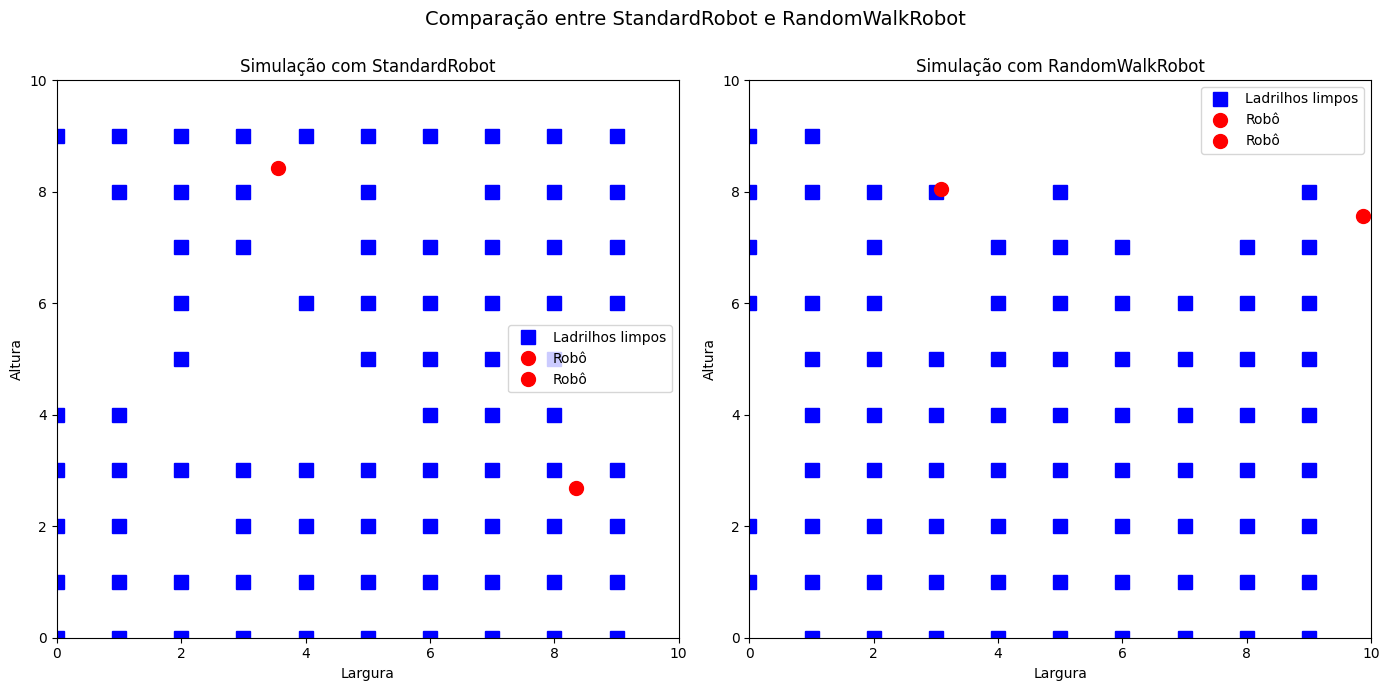

In [25]:
def visualizarComparacaoSimulacao(num_robots, speed, width, height, min_coverage, robot_type1, robot_type2):
    """
    Visualiza a comparação entre duas estratégias de robôs aspiradores em paralelo.

    Parâmetros:
    - num_robots: número de robôs.
    - speed: velocidade dos robôs.
    - width: largura da sala.
    - height: altura da sala.
    - min_coverage: fração mínima da sala a ser limpa.
    - robot_type1: primeira classe de robô (ex.: StandardRobot).
    - robot_type2: segunda classe de robô (ex.: RandomWalkRobot).
    """

    # Configura a figura com dois gráficos lado a lado
    fig, axs = plt.subplots(1, 2, figsize=(14, 7))
    fig.suptitle("Comparação entre StandardRobot e RandomWalkRobot", fontsize=14)

    # Função interna para simular e plotar
    def simularEPlotar(ax, robot_type, titulo):
        sala = RectangularRoom(width, height)
        robos = [robot_type(sala, speed) for _ in range(num_robots)]

        # Executa a simulação
        while sala.getNumCleanedTiles() / sala.getNumTiles() < min_coverage:
            for robo in robos:
                robo.updatePositionAndClean()

        # Extrai os ladrilhos limpos
        x, y = zip(*sala.cleaned_tiles)
        ax.plot(x, y, 'bs', markersize=10, label='Ladrilhos limpos')

        # Plota a posição final dos robôs
        for robo in robos:
            pos = robo.getRobotPosition()
            ax.plot(pos.getX(), pos.getY(), 'ro', markersize=10, label='Robô')

        ax.set_xlim(0, width)
        ax.set_ylim(0, height)
        ax.set_xlabel("Largura")
        ax.set_ylabel("Altura")
        ax.set_title(titulo)
        ax.legend(loc='best')

    # Simulação do StandardRobot
    simularEPlotar(axs[0], robot_type1, "Simulação com StandardRobot")

    # Simulação do RandomWalkRobot
    simularEPlotar(axs[1], robot_type2, "Simulação com RandomWalkRobot")

    # Mostra os gráficos
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

resultado = runSimulation(2, 1.0, 10, 10, 0.8, 30, StandardRobot)
print(f"Média de passos necessários: {resultado}")

# Execução da função
visualizarComparacaoSimulacao(
    num_robots=2,
    speed=1.0,
    width=10,
    height=10,
    min_coverage=0.8,
    robot_type1=StandardRobot,
    robot_type2=RandomWalkRobot
)

Simulando...: 100%|██████████| 10/10 [00:03<00:00,  3.30it/s]


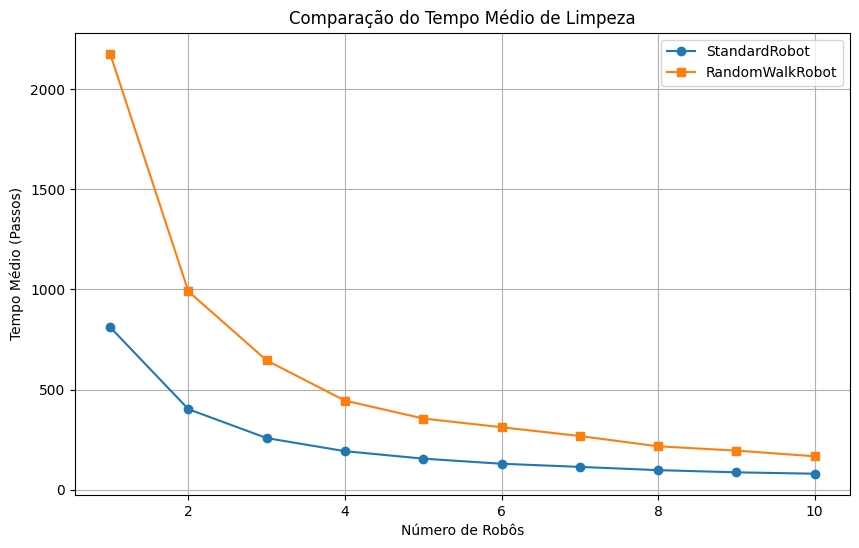

In [26]:
def showPlot1(title, x_label, y_label):
    """
    Plota o tempo médio necessário para limpar 80% da sala para StandardRobot e RandomWalkRobot.
    """
    num_robot_range = range(1, 11)  # Intervalo de 1 a 10 robôs
    times1 = []  # Resultados para StandardRobot
    times2 = []  # Resultados para RandomWalkRobot

    # Barra de progresso para simulação
    for num_robots in tqdm(num_robot_range, desc="Simulando..."):
        times1.append(runSimulation(num_robots, 1.0, 20, 20, 0.8, 20, StandardRobot))
        times2.append(runSimulation(num_robots, 1.0, 20, 20, 0.8, 20, RandomWalkRobot))

    # Plotagem usando matplotlib
    plt.figure(figsize=(10, 6))
    plt.plot(num_robot_range, times1, label='StandardRobot', marker='o')
    plt.plot(num_robot_range, times2, label='RandomWalkRobot', marker='s')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid()
    plt.show()

# Execução
showPlot1(
    title="Comparação do Tempo Médio de Limpeza",
    x_label="Número de Robôs",
    y_label="Tempo Médio (Passos)"
)

### **Resultado gráfico da comparação entre os movimentos**

O eixo X representa o número de robôs (1 a 10) e o eixo Y representa o tempo médio em passos.

A versão `StandardRobot` se	move em linha reta até chegar a parede ou atingir obstáculo. A versão `RandomWalkRobot`	escolhe uma nova direção a cada movimento.

* **Linha azul** (`StandardRobot`): mostra o tempo médio necessário para limpar 80% da sala.
* **Linha laranja** (`RandomWalkRobot`): mostra o tempo médio para o RandomWalkRobot.

O `StandardRobot` tende a ser mais eficiente porque seu movimento linear cobre mais espaço antes de mudar de direção.
